# Assignment 1

Welcome to the first assignment of CS188 Computer Vision course! 

First of all, please type your information below.

In [ ]:
#@title Your Info { display-mode: "form" }

Name = 'Victoria Lam' #@param {type:"string"}
UID = '305608770' #@param {type:"string"}

### Goals
In the first assignment, you will learn:
* How to prepare data for image classification
* How to use Google Colab
* How to implement a k-Nearest Neighbor (kNN) classifier
* How to implement a linear/logistic/softmax regression classifier

Free free to raise issues in the Piazza forum if you find any bugs or have any questions about the assignment. 

Please do not directly copy code from other sources.

This assignment is due on **Sunday, Jan 29**. Good luck with your work!

❗**Once you have finished all the questions, it will still take approximately *30 minutes* to re-run the entire notebook in order to prepare the submission version. Make sure to allocate enough time for this task and start early.**

## Getting Started


### Overview

In this assignment, you will be working with the [MiniPlaces dataset](https://github.com/CSAILVision/miniplaces), a small-scale version of the [Places2 dataset](http://places2.csail.mit.edu/), which is a large-scale dataset of scene images (10+ million images) with a wide variety of real-world environments (400+ unique scene categories). The MiniPlaces dataset is a subset of the [Places2 dataset](http://places2.csail.mit.edu/) and contains 100,000 images for training, 10,000 images for validation, and 10,000 images for testing, each of which has been annotated with one of 100 different scene categories. These images are divided into three folders: train, val, and test. 

The MiniPlaces dataset is a useful resource for developing and testing image classification models, particularly those that are designed to recognize different types of environments and scenes.

Your task for this assignment is to create two new datasets called *TinyPlaces-Binary* and *TinyPlaces-Multiclass* from the MiniPlaces dataset. Both datasets should be much smaller in size than the original MiniPlaces dataset (more details later).

In addition to creating the TinyPlaces datasets, you will also need to implement and evaluate the performance of the following classifiers on both datasets:
* k-Nearest Neighbor (kNN) Classifier
* Linear/logistic/sofrmax Regression Classifier

---


##Q0: Understanding the storage of colab (0 pts)

Colab is a cloud-based service that allows users to write and run code in a Jupyter notebook-style enviroment. Colab provides users with temporary virtual machines to run their code on. 

For file storage, Colab provides users with access to a variety of storage options, including temporary storage space and Google Drive storage.

1. Temporary storage space, also known as "local runtime storage," is a space on the virtual machine (VM) that is allocated to you when you open a Colab notebook. This space is temporary in the sense that it is wiped clean whenever you close the notebook or disconnect from the VM. However, it is much faster than Google Drive storage, since it is located on the same machine as the VM. This makes it ideal for storing and accessing large datasets or intermediate data that is being used frequently in your notebook.

2. Google Drive storage is a more permanent storage option that is accessed through your Google account. It is ***much much*** slower than temporary storage space, since it requires data to be transferred over the internet to and from the VM. However, it is useful for storing and sharing notebooks and data that you want to keep long-term, or for collaborating with other users.

As we are going to be working with a lot of images, and to make things run smoothly, we will be using Colab's temporary storage space to store our data. This means that every time you open up this notebook, we will need to re-download and process the dataset. Don't worry though - this shouldn't take long, usually just a minute or less. Okay, let's get started!

In [1]:
import os
# Let's make our assignment directory
CS188_path = './'
os.makedirs(os.path.join(CS188_path, 'Assignment1', 'data'), exist_ok=True)
# os.makedirs will create directories recursively, i.e., it will create the 
# directories and any missing parent directories if they do not exist.

# Now, let's specify the assignment path we will be working with as the root.
root_dir = os.path.join(CS188_path, 'Assignment1')

## Q1: Data preparation (25 pts)
For Q1, you will need to create the *TinyPlaces-Binary* and *TinyPlaces-Multiclass* datasets. 

First, you will be creating two datasets - `tinyplaces_binary_train` and `tinyplaces_binary_val` - from the MiniPlaces dataset (https://github.com/CSAILVision/miniplaces). You will also be creating two additional datasets - `tinyplaces_multi_train` and `tinyplaces_multi_val` - that are similar to the first two datasets but with 20 categories instead of just 2.

To do this, you should follow these steps:
1. Follow the code cells below to download the MiniPlaces dataset from this link: https://drive.google.com/file/d/16GYHdSWS3iMYwMPv5FpeDZN2rH7PR0F2/view, and extract files using python. Don't worry, we have provided commands to do this.

2. Use the file categories_tinyplaces.txt to select images from the target subcategories in the MiniPlaces dataset.

3. Kindly follow the hints in the following codeblocks to implement different functions to finish this task.

### Q1.1: download and extract dataset (0 pts)
We will use this sub-question as an example to show you how to download files in Colab in an effortless way.



In [2]:
# Downloading this file takes about a few seconds.
# Download the tar.gz file from google drive using its file ID.
!pip3 install --upgrade gdown --quiet
!gdown 16GYHdSWS3iMYwMPv5FpeDZN2rH7PR0F2 # this is the file ID of miniplaces dataset

Downloading...
From: https://drive.google.com/uc?id=16GYHdSWS3iMYwMPv5FpeDZN2rH7PR0F2
To: /content/data.tar.gz
100% 460M/460M [00:02<00:00, 182MB/s]


This code block shows you how to extract files from the downloaded "data.tar.gz" zip file. 

It will takes more than 30 minutes to finish if you choose to extract this file in your google driver. However, it should take only about 10 seconds if you extract it in the colab temporary directory (our choice).

In [3]:
import tarfile
from tqdm import tqdm

# Open the tar.gz file
tar = tarfile.open("data.tar.gz", "r:gz")
# Extract the file to the "/content/drive/MyDrive/CS188-2023/Assignment1/data" folder
total_size = sum(f.size for f in tar.getmembers())
with tqdm(total=total_size, unit="B", unit_scale=True, desc="Extracting tar.gz file") as pbar:
    for member in tar.getmembers():
        tar.extract(member, os.path.join(root_dir, 'data'))
        pbar.update(member.size)
# Close the tar.gz file
tar.close()

Extracting tar.gz file: 100%|██████████| 566M/566M [00:20<00:00, 27.7MB/s]


If you are curious, however, here is an example output if you choose to extract the files to Google Drive:

```
Extracting tar.gz file: 100%|██████████| 566M/566M [21:49<00:00, 432kB/s] 
```

In contrast, extracting files to temporary workspace only takes ~20-40 seconds.

### Q1.2: Create subsets (15 pts)

In this question, you will create the TinyPlaces datasets for both binary and multiclass classification tasks.

Follow these steps to complete this question:
1. Download `categories_tinyplaces.txt` from [this link](https://raw.githubusercontent.com/UCLAdeepvision/CS188-Assignments-2022Winter/master/Assignment1-Release/categories_tinyplaces.txt) and `val.txt` from [this link](https://github.com/CSAILVision/miniplaces/tree/master/data/val.txt.). You can download it directly to `/content/MyDrive/2023-CS188/Assignment1/data` in Colab. This file is also provided in the assignment repository on Github and can be directly uploaded.

2. Use the file `categories_tinyplaces.txt` to select images from the target subcategories in the MiniPlaces dataset.
  1. Load the target subcategories and their associated class IDs from the file `categories_tinyplaces.txt`. This file contains a list of subcategory names, in the format of directory paths, and class IDs, with one pair per line. For example, a line of `/b/bathroom 16` indicates a subcategory name "bathroom" with a class ID of "16". The directory of "bathroom" images is located at "root/data/images/SPLIT/b/bathroom", where "SPLIT" is either train, val, or test, and 'root' is specified as `/content/MyDrive/2023-CS188/Assignment1`. There are a total of 20 subcategories in this file. The first 10 subcategories are indoor scenes, and the last 10 are outdoor scenes.
  2. Iterate through the images in the train and val folders and select only those that belong to one of the target subcategories in `categories_tinyplaces.txt`. For training data, take the **first** 500 images (`00000001.jpg` to `00000500.jpg`) of each subcategory in the root/data/images/train folder (500x20=10k images in total). For validation data, take the first 50 images of each subcategory in `val.txt`. The TinyPlaces-val dataset should contain a total of 1,000 images (50x20=1k images in total).
  3. Resize all images to 32x32 and flatten them to create CIFAR-like 3072-dimensional vectors (3x32x32=3072).

3. Assign labels to create the TinyPlaces datasets.
  1. `tinyplaces_binary_train`: the training set for the binary classification task. Assign the images in the 10 indoor subcategories the label "0" and the images in the 10 outdoor categories the label "1".
  2. `tinyplaces_binary_val`: the validation set for the binary classification task.
  3. `tinyplaces_multi_train`: the training set for the multiclass classification task. Assign each subcategory a class ID (from 0 to 19) in the same order as `categories_tinyplaces.txt`. For example, the first class "bathroom" should have a class ID of "0", and the last class "rainforest" should have a class ID of "19".
  4. `tinyplaces_multi_val`: the validation set for the multiclass classification task.

4. Dump the generated datasets to `root/data/{dataset_name}.pkl` using the pickle package. You should have four pickle files: `tinyplaces_binary_train.pkl`, `tinyplaces_binary_val.pkl`, `tinyplaces_multi_train.pkl`, and `tinyplaces_multi_val.pkl`. Each pickle file should have two keys: "data" for a 10,000x3072 array and "label" for a 10,000x1 array or list.

In [4]:
# 1. Download categories_tinyplaces.txt to root/dataimport urllib.request
import urllib.request
def download_files():
    """
    Downloads the required files from the given links and saves them to the 
      specified directory.
    """
    # Download categories_tinyplaces.txt and save it to the data directory
    categories_tinyplaces_url = \
      'https://raw.githubusercontent.com/UCLAdeepvision/CS188-Assignments-2023Winter/main/Assignment1/categories_tinyplaces.txt'
    urllib.request.urlretrieve(categories_tinyplaces_url, 
                               f'{root_dir}/data/categories_tinyplaces.txt')

    # Download val.txt and save it to the data directory
    val_url = 'https://raw.githubusercontent.com/CSAILVision/miniplaces/master/data/val.txt'
    urllib.request.urlretrieve(val_url, f'{root_dir}/data/val.txt')
download_files()

In [5]:
# 2. Load the target subcategories and their associated class IDs.
import os
import pickle

import numpy as np

def load_subcategories(txt_path):
    """
    Loads the target subcategories and their class IDs from the specified file.
    Map the class IDs to sequential integers from 0 to 19 according to their order.

    Parameters:
        txt_path (str): The filepath of the categories_tinyplaces.txt file.
        
    Returns:
        subcategories (dict): A dictionary mapping subcategory names to both 
          original class IDs and modified IDS.
    Example output: 
      {'bathroom': {'ori_class_id': 16, 'class_id': 0}, 
       'bedroom': {'ori_class_id': 18, 'class_id': 1},
       ...
      }
    """
    # TODO: Implement the function by following the steps below:
    # 1. Open the categories_tinyplaces.txt file and read its contents into the 'lines' variable
    # 2. Iterate through the lines in the file and split each line by space 
    #    character to separate the subcategory name and class ID. Note that you
    #    need to further filter out the prefix in the txt file for category names.
    # 3. Store the subcategory and its class ID in the dictionary, mapping the 
    #    class ID to a sequential integer from 0 to 19 according to its order.
    # 4. Return the dictionary of subcategories

    # Initialize an empty dictionary to store the subcategories
    subcategories = {}
    ################# Your Implementations #####################################
    with open(txt_path, 'r') as cat_file:
      lines = cat_file.readlines()
      for i, line in enumerate(lines):
        category, id = line.strip().split()
        category = category[3:] # filter out the prefix, the first 3 characters
        subcategories[category] = {'ori_class_id': (int)(id), 'class_id': (int)(i)}
    ################# End of your Implementations ##############################
    return subcategories

In [6]:
# try to debug using this code segment
# Specify file path
txt_path = os.path.join(root_dir, 'data', 'categories_tinyplaces.txt')
# Load the target subcategories and their class IDs
subcategories = load_subcategories(txt_path)
print(subcategories)

{'bathroom': {'ori_class_id': 16, 'class_id': 0}, 'bedroom': {'ori_class_id': 18, 'class_id': 1}, 'bookstore': {'ori_class_id': 20, 'class_id': 2}, 'classroom': {'ori_class_id': 33, 'class_id': 3}, 'dining_room': {'ori_class_id': 45, 'class_id': 4}, 'food_court': {'ori_class_id': 48, 'class_id': 5}, 'kitchen': {'ori_class_id': 59, 'class_id': 6}, 'lobby': {'ori_class_id': 63, 'class_id': 7}, 'living_room': {'ori_class_id': 62, 'class_id': 8}, 'office': {'ori_class_id': 70, 'class_id': 9}, 'baseball_field': {'ori_class_id': 15, 'class_id': 10}, 'bridge': {'ori_class_id': 24, 'class_id': 11}, 'campsite': {'ori_class_id': 27, 'class_id': 12}, 'canyon': {'ori_class_id': 29, 'class_id': 13}, 'coast': {'ori_class_id': 35, 'class_id': 14}, 'fountain': {'ori_class_id': 49, 'class_id': 15}, 'highway': {'ori_class_id': 53, 'class_id': 16}, 'playground': {'ori_class_id': 74, 'class_id': 17}, 'mountain': {'ori_class_id': 68, 'class_id': 18}, 'rainforest': {'ori_class_id': 77, 'class_id': 19}}


You should further parse the directory name to filter out the clas name. The output should be like:


```
{'bathroom': {'ori_class_id': 16, 'class_id': 0}, 'bedroom': {'ori_class_id': 18, 'class_id': 1}, 'bookstore': {'ori_class_id': 20, 'class_id': 2}, 'classroom': {'ori_class_id': 33, 'class_id': 3}, 'dining_room': {'ori_class_id': 45, 'class_id': 4}, 'food_court': {'ori_class_id': 48, 'class_id': 5}, 'kitchen': {'ori_class_id': 59, 'class_id': 6}, 'lobby': {'ori_class_id': 63, 'class_id': 7}, 'living_room': {'ori_class_id': 62, 'class_id': 8}, 'office': {'ori_class_id': 70, 'class_id': 9}, 'baseball_field': {'ori_class_id': 15, 'class_id': 10}, 'bridge': {'ori_class_id': 24, 'class_id': 11}, 'campsite': {'ori_class_id': 27, 'class_id': 12}, 'canyon': {'ori_class_id': 29, 'class_id': 13}, 'coast': {'ori_class_id': 35, 'class_id': 14}, 'fountain': {'ori_class_id': 49, 'class_id': 15}, 'highway': {'ori_class_id': 53, 'class_id': 16}, 'playground': {'ori_class_id': 74, 'class_id': 17}, 'mountain': {'ori_class_id': 68, 'class_id': 18}, 'rainforest': {'ori_class_id': 77, 'class_id': 19}}

 ```
 



In [7]:
from tqdm import trange
import cv2

def select_samples(subcategories, root_dir, split, n_images_per_subcategory):
    """
    Selects a subset of images from the specified folder based on the class IDs in the txt file.
    Resizes the selected images to 32x32 and flattens them to create CIFAR-like 3072-d vectors.
    
    Parameters:
        subcategories (dict): A dictionary mapping subcategory names to class IDs.
        root_dir (str): The root directory of the MiniPlaces dataset.
        split (str): The split (train or val) of the MiniPlaces dataset to select images from.
        n_images_per_subcategory (int): The number of images to select from each subcategory.
        
    Returns:
        samples (list): A list of tuples, where each tuple contains the image 
          data and class ID of an image.
    """
    # TODO: Implement this function.
    # Hints: 
    # 1. If the split is 'val', load the filepaths and class IDs from the 'val.txt' 
    #    file and store them in the 'val_data' list
    # Note that val data and train data have different formats so pay attention.
    # 2. Iterate through selected images
    # 3. Load the image and resize it to 32x32
    # 4. Construct a sample_pair as a tuple of the image data and class ID.
    # 5. Add the sample_pair to the list
    # 6. Return the list of samples

    # Initialize an empty list to store the selected samples (images, labels)
    samples = []
    ################# Your Implementations #####################################
    if (split == 'val'):
      with open(f"{root_dir}/data/val.txt", 'r') as val_file:
        val_data = val_file.readlines()
        for subcategory in subcategories:
          ori_id, class_id = subcategories[subcategory]['ori_class_id'], subcategories[subcategory]['class_id']
          i=0
          sample_pair=[]
          while len(sample_pair) < 50 and i < len(val_data):
            path = f'{root_dir}/data/images/'
            img_path, id = val_data[i].strip('\n').split()
            if int(id) == ori_id:
              img = cv2.resize(cv2.cvtColor(cv2.imread(cv2.samples.findFile(path + img_path)), cv2.COLOR_BGR2RGB), (32, 32))
              img = img.flatten()
              sample_pair.append( (img, class_id) )
            i+=1
          samples.extend(sample_pair)
    elif (split == 'train'):
      for subcategory in subcategories:
        ori_id, class_id = subcategories[subcategory]['ori_class_id'], subcategories[subcategory]['class_id']
        for i in range(n_images_per_subcategory):
          path = f"{root_dir}/data/images/{split}/{subcategory[0]}/{subcategory}/{'0'*(8 - len(str(i+1))) + str(i+1)}.jpg"
          img = cv2.resize(cv2.cvtColor(cv2.imread(cv2.samples.findFile(path)), cv2.COLOR_BGR2RGB), (32, 32))
          img = img.flatten()
          samples.append( (img, class_id) )
    ################# End of your Implementations ##############################
    return samples

In [8]:
# Try to debug using this code segment:
tmp_train_samples = select_samples(subcategories, root_dir, 'train', 50) 
tmp_val_samples = select_samples(subcategories, root_dir, 'val', 5) 

In [9]:
def create_tinyplaces(samples, binary=True):
    """
    Creates a TinyPlaces dataset from the specified images.
    
    Parameters:
        samples (list): A list of tuples, where each tuple contains the image data
          and class ID of an image.
        binary (bool, optional): If True, the dataset is for binary classification. 
          If False, the dataset is for multiclass classification.
        
    Returns:
        dataset (dict): A dictionary with two keys: "data" and "label". The "data" 
          key contains a numpy array of image data, and the "label" key contains 
          a numpy array of class labels.
     Example output shape: 
      {'data': (N, 3072), 
       'labels': (N,), # 0, 1 for binary, and 0 to 19 for multiclass
      }
    """

    # Initialize empty lists to store the image data and labels
    data, labels = [], []
    ################# Your Implementations #####################################
    for img, class_id in samples:
      data.append(img)
      if binary:
        if class_id < 10:
          labels.append(0)
        else:
          labels.append(1)
      else:
        labels.append(class_id)
    data = np.array(data)
    labels = np.array(labels)  
        
    ################# End of your Implementations ##############################
    
    # Create the dataset dictionary
    dataset = {"data": data, "label": labels}
    return dataset

In [10]:
# Try to debug using this code segment:
tmp_binary_train = create_tinyplaces(tmp_train_samples, binary=True)
tmp_multi_train = create_tinyplaces(tmp_train_samples, binary=False)

print('binary:')
print(tmp_binary_train['data'].shape, tmp_binary_train['label'].shape)
print('unique class ids:', np.unique(tmp_binary_train['label']))

print('multiclass:')
print(tmp_multi_train['data'].shape, tmp_multi_train['label'].shape)
print('unique class ids:', np.unique(tmp_multi_train['label']))

binary:
(1000, 3072) (1000,)
unique class ids: [0 1]
multiclass:
(1000, 3072) (1000,)
unique class ids: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


The output should be like:
```
binary:
(1000, 3072) (1000,)
unique class ids: [0 1]
multiclass:
(1000, 3072) (1000,)
unique class ids: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
```

#### About pickle

To dump a dictionary as a pickle file, follow this example:

```
import pickle

# Create a dictionary to be dumped
data = {'key1': [1, 2, 3], 'key2': 'string value'}

# Open a file in binary mode
with open('dict.pkl', 'wb') as f:
  # Use pickle.dump to write the dictionary to the file
  pickle.dump(data, f)
```

To load a dictionary from a pickle file, here is an example:
```
# Open the file in binary mode
with open('dict.pkl', 'rb') as f:
  # Use pickle.load to read the data from the file
  data = pickle.load(f)

# Print the loaded data
print(data)  # Output: {'key1': [1, 2, 3], 'key2': 'string value'}
```

Now, put everything together and make the required four datasets:

In [11]:
# Set the root directory of the MiniPlaces dataset
root_dir = './Assignment1'

# Load the target subcategories and their class IDs
subcategories = load_subcategories(os.path.join(root_dir, 'data', 'categories_tinyplaces.txt'))

# Select the samples from the train split of the MiniPlaces dataset
train_samples = select_samples(subcategories, root_dir, 'train', 500)

# Create the TinyPlaces datasets for binary and multiclass classification
tinyplaces_binary_train = create_tinyplaces(train_samples, binary=True)
tinyplaces_multi_train = create_tinyplaces(train_samples, binary=False)

# Select the samples from the val split of the MiniPlaces dataset
val_samples = select_samples(subcategories, root_dir, 'val', 50)

# Create the TinyPlaces datasets for binary and multiclass classification
tinyplaces_binary_val = create_tinyplaces(val_samples, binary=True)
tinyplaces_multi_val = create_tinyplaces(val_samples, binary=False)

# Save the TinyPlaces datasets to the data directory
data_dir = os.path.join(root_dir, 'data')

with open(os.path.join(data_dir, 'tinyplaces_binary_train.pkl'), 'wb') as f:
    pickle.dump(tinyplaces_binary_train, f)
    
with open(os.path.join(data_dir, 'tinyplaces_multi_train.pkl'), 'wb') as f:
    pickle.dump(tinyplaces_multi_train, f)
    
with open(os.path.join(data_dir, 'tinyplaces_binary_val.pkl'), 'wb') as f:
    pickle.dump(tinyplaces_binary_val, f)
    
with open(os.path.join(data_dir, 'tinyplaces_multi_val.pkl'), 'wb') as f:
    pickle.dump(tinyplaces_multi_val, f)


### Q1.3 Visualization (5pts)

In this part, you will implement functions to visualize random samples from the created binary dataset and multiclass dataset.

Here is a provided function:

In [12]:
import matplotlib.pyplot as plt

def visualize_binary_samples(data_dict, samples_per_class, seed=None):
    """
    Visualizes a random selection of samples from the TinyPlaces-binary dataset.
    
    Parameters:
        data_dict (dict): A dictionary contains images and labels.
        samples_per_class (int): The number of samples to display for each class.
        
    Returns:
        None. Displays a grid of images.
    """
    # if seeded.
    np.random.seed(seed)
    # Initialize a list to store the selected samples
    selected_samples = []

    # Initialize the figure
    n_classes = 2
    fig, axs = plt.subplots(n_classes, samples_per_class, 
                            figsize=(samples_per_class*1.5, n_classes*1.5))
    axs = axs.flatten()
    # Iterate through the classes
    for y, cls in enumerate(['indoor', 'outdoor']):
        # Find the indices of samples belonging to the current class
        idxs = np.arange(len(data_dict['label']))[data_dict['label'] == y]
        # Select a random subset of samples from the current class
        idxs = np.random.choice(idxs, samples_per_class, replace=False)
        for i, idx in enumerate(idxs):
            axis = axs[i + y * samples_per_class]
            if i == 0:
              axis.set_title(cls, loc='left')
            image = data_dict['data'][idx].reshape(32, 32, 3)
            axis.imshow(image)
            axis.axis('off')
    plt.tight_layout()
    plt.show()


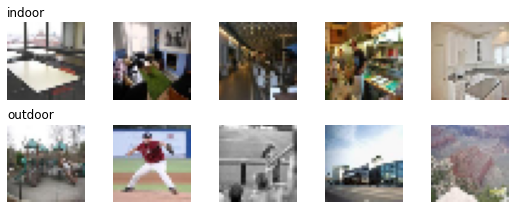

In [13]:
visualize_binary_samples(tinyplaces_binary_train, 5)

Now, modify the `visualize_binary_samples` function to create a new function `visualize_multiclass_samples` to support visualizing multiclass samples. The `subcategories` dict should be also provided as input to retrieve the class names.

In [14]:
def visualize_multiclass_samples(data_dict, subcategories, samples_per_class, seed=None):
    """
    Visualizes a random selection of samples from the TinyPlaces-multiclass dataset.
    
    Parameters:
        data_dict (dict): A dictionary contains images and labels.
        subcategories (dict): A dictionary mapping subcategory names to class IDs.
        samples_per_class (int): The number of samples to display for each class.
        
    Returns:
        None. Displays a grid of images.
    """
    # if seeded.
    np.random.seed(seed)
    ################# Your Implementations #####################################
    selected_samples = []

    # Initialize the figure
    n_classes = len(subcategories)
    fig, axs = plt.subplots(n_classes, samples_per_class, 
                            figsize=(samples_per_class*1.5, n_classes*1.5))
    axs = axs.flatten()
    # Iterate through the classes
    for y, cls in enumerate(subcategories):
        # Find the indices of samples belonging to the current class
        idxs = np.arange(len(data_dict['label']))[data_dict['label'] == y]
        # Select a random subset of samples from the current class
        idxs = np.random.choice(idxs, samples_per_class, replace=False)
        for i, idx in enumerate(idxs):
            axis = axs[i + y * samples_per_class]
            if i == 0:
              axis.set_title(cls, loc='left')
            image = data_dict['data'][idx].reshape(32, 32, 3)
            axis.imshow(image)
            axis.axis('off')
    plt.tight_layout()
    plt.show()
    ################# End of your Implementations ##############################


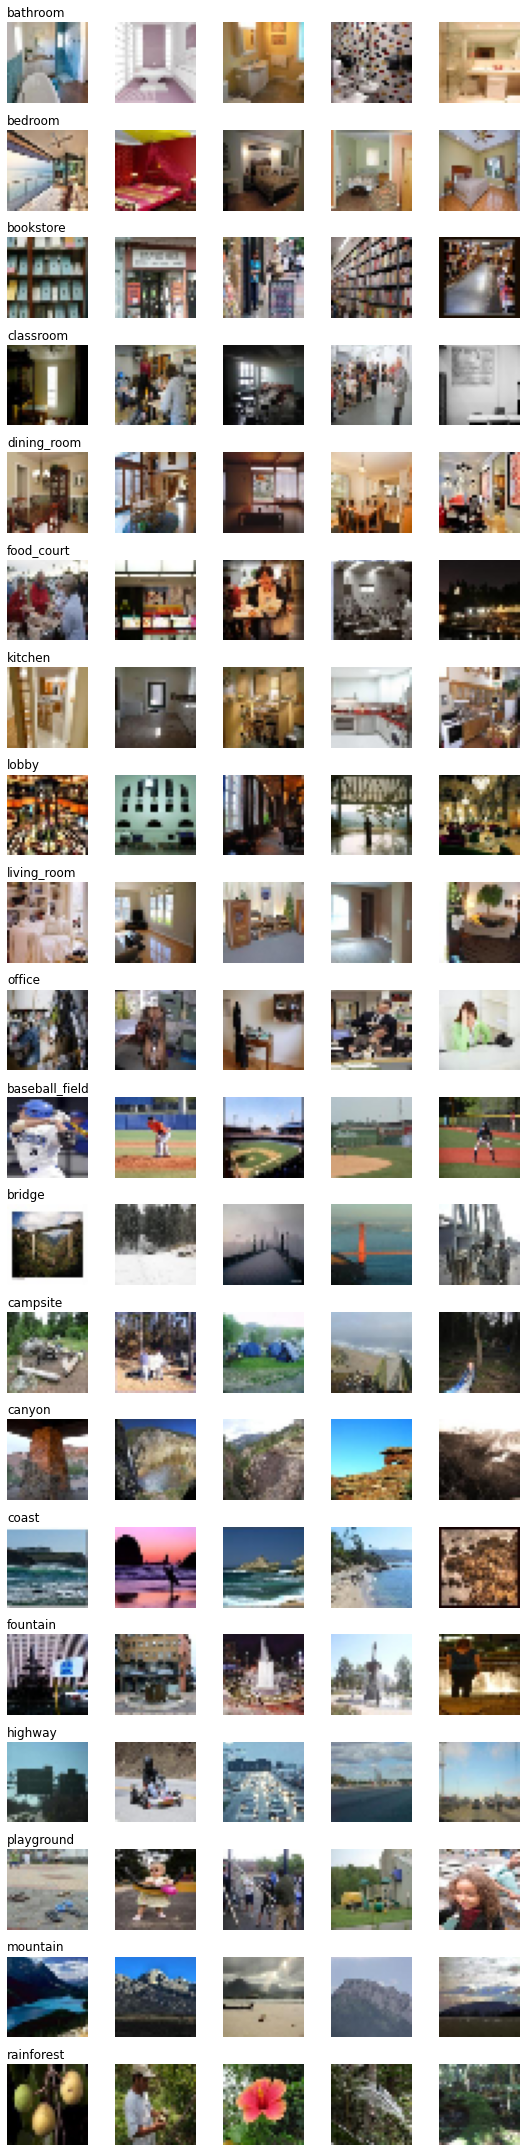

In [15]:
visualize_multiclass_samples(tinyplaces_multi_train, subcategories, 5)

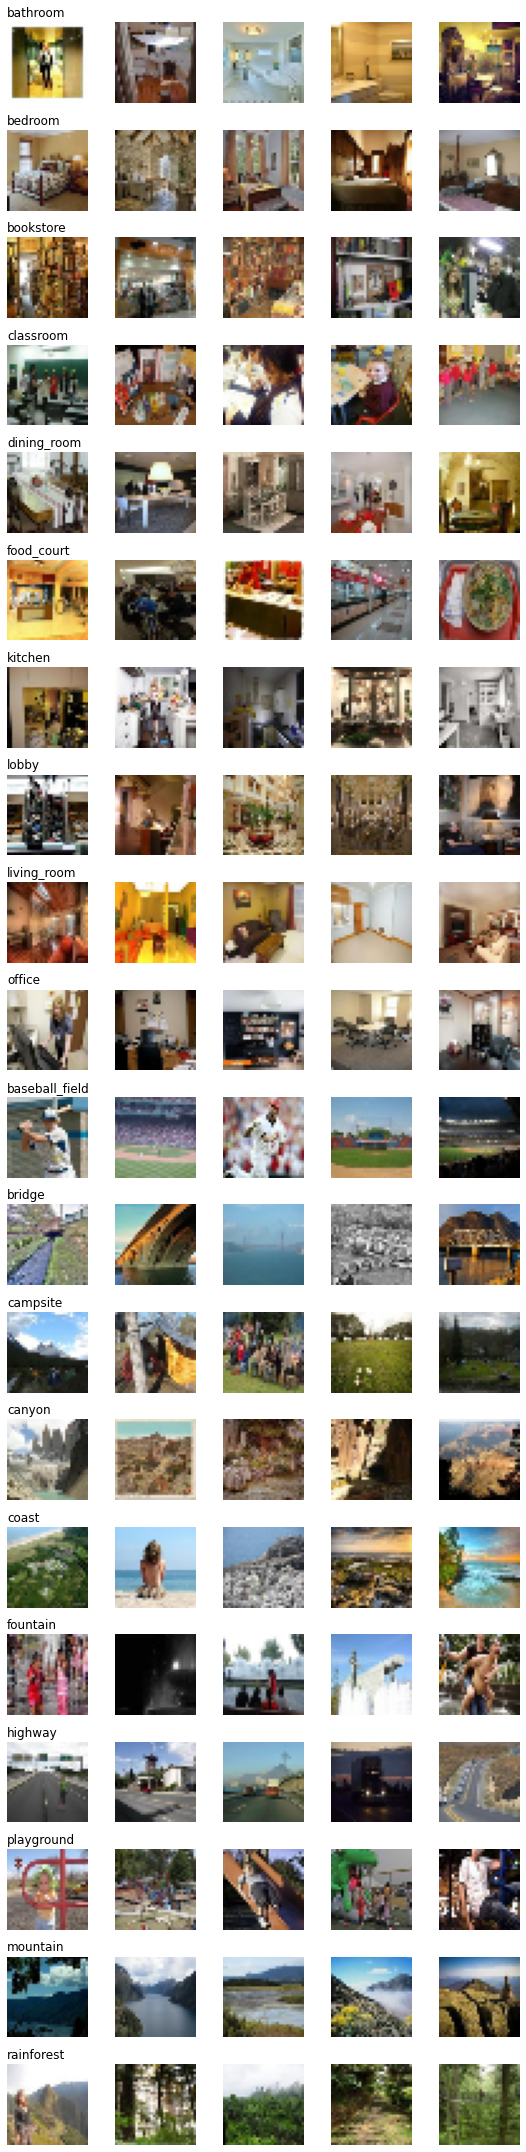

In [16]:
visualize_multiclass_samples(tinyplaces_multi_val, subcategories, 5)

### Q1.4 Data Class (5pts)

When implementing machine learning algorithms, it's usually a good idea to use a small subset of the full dataset. In this way, your code will run much faster, allowing for more interactive and efficient development and debugging. Once you are satisfied that you have correctly implemented the algorithm, you can then rerun with the entire dataset.

Our next task is to implement a subsampling function.

In [17]:
class TinyPlacesDataset(object):
    def __init__(self, data_dict):
        self.dataset = data_dict
        self.num_samples = len(data_dict['data'])

    def subsample(self, ratio=0.1, seed=None):
        """
        Subsamples the TinyPlaces dataset.
        
        Parameters:
            ratio (float, optional): The ratio of the subsampled dataset to the original dataset.
              Default is 0.1.
        
        Returns:
            subsampled_dataset (TinyPlacesDataset): A new TinyPlacesDataset object
              containing the subsampled data.
        """
        if seed is not None:
            np.random.seed(seed)
        ################# Your Implementations ################################
        # Randomly select a subset of the data
        
        rand_subset = [i for i in range(self.num_samples) if np.random.rand() < ratio]

        # Create a new TinyPlacesDataset object using the subsampled data
        subsampled_dataset = TinyPlacesDataset( {'data': self.dataset['data'][rand_subset], 'label': self.dataset['label'][rand_subset]} )

        # Return the new TinyPlacesDataset object
        ################# End of your Implementations ##########################
        return subsampled_dataset


In [18]:
# Try to debug using this code segment
# seed your results
np.random.seed(0)

tinyplaces_binary_train = TinyPlacesDataset(tinyplaces_binary_train)
tinyplace_binary_subsampled = tinyplaces_binary_train.subsample(0.1)
print('before:')
print('num_samples:', tinyplaces_binary_train.num_samples)
print('after:')
print('num_samples:', tinyplace_binary_subsampled.num_samples)

before:
num_samples: 10000
after:
num_samples: 1021


### Q1.5: Construct a complete dataset class (optional bonus 5 pts)

Construct a complete dataset class that can builds TinyPlacesDataset directly from `root_dir`, `split`, `n_images_per_class` and `binary` arguments using the functions we have implemented above. Include the subsample and visualization codes in this class as well.

In [19]:
################# Your Implementations #####################################
class TinyPlacesDatasetV2(object):
    def __init__(self, root_dir, split, n_images_per_class, binary=True):
      """
      Initializes a TinyPlaces dataset from the specified root directory, split, 
        and number of images per class.
      Parameters:
          root_dir (str): The root directory of the MiniPlaces dataset.
          split (str): The split to select images from ('train' or 'val').
          n_images_per_class (int): The number of images to select per class.
          binary (bool, optional): If True, the dataset is for binary classification. 
            If False, the dataset is for multiclass classification.
      
      Returns:
          None.
      """
    def subsample(self, ratio=0.1):
      """
      Subsamples the TinyPlaces dataset.
      
      Parameters:
          ratio (float, optional): The ratio of the subsampled dataset to the original dataset.
            Default is 0.1.
      
      Returns:
          subsampled_dataset (TinyPlacesDataset): A new TinyPlacesDataset object
             containing the subsampled data.
      """
      pass
    
    def visualize_samples(self, samples_per_class, seed=None):
      """
      Visualizes a random selection of samples from the TinyPlaces dataset.
      
      Parameters:
          samples_per_class (int): The number of samples to display for each class.
          seed (int, optional): The seed for the random number generator. Default is None.
      
      Returns:
          None. Displays a grid of images.
        
      Hints: use self.binary information.
      """
      pass

################# End of your Implementations ##############################


In [ ]:
# You can delete this code cell if you skip this question.

# Create a TinyPlaces-binary dataset
#tinyplaces_train_b = TinyPlacesDatasetV2(root_dir, 'train', 500, binary=True)
#tinyplaces_val_b = TinyPlacesDatasetV2(root_dir, 'val', 50, binary=True)
# Create a TinyPlaces-multiclass dataset
#tinyplaces_train_m = TinyPlacesDatasetV2(root_dir, 'train', 500, binary=False)
#tinyplaces_val_m = TinyPlacesDatasetV2(root_dir, 'val', 50, binary=False)

In [ ]:
# You can delete this code cell if you skip this question.
#tinyplaces_train_b.visualize_samples(5)
#tinyplaces_train_m.visualize_samples(5)

## Q2: Regression (40 pts)

For this question, you will be implementing and evaluating the performance of linear and logistic regression classifiers on the TinyPlaces-Binary dataset and softmax regression classifier on the TinyPlaces-Multiclass dataset.

Recall some details:
 1. Linear Regression models the relationship between an input and an output by fitting a linear function to the data. In this assignemnt, we will use the Mean Saquare Error (MSE) loss function to minimize the weights and biases of the linear function.
 2. Logistic Regression is commonly used for binary classification tasks. It is an extension of linear regression that adds a logistic function to the linear output. We will use the Cross-Entropy Loss to optimize the logistic regression model.
 3. Softmax regression is usually used for multiclass classification tasks. It is an extension of linear regression that adds a softmax function to the linear output and uses the Negative Log Likelihood (NLL) loss to optimize the model.



The goal of this exercise is to go through a simple example of the data-driven image classification pipeline, and also to practice writing efficient, vectorized code in PyTorch. 

❗
You may not use any functions from torch.nn or torch.nn.functional in your implementation.


The goals of this exercise are to go through a simple example of the data-driven image classification pipeline, and also to practice writing efficient, vectorized code in [PyTorch](https://pytorch.org/).

You may not use any functions from torch.nn or torch.nn.functional.

### Q2.0: Setup code (0 pts)

We will run the codes on GPU. Go to:
Runtime->Change Runtime Type->Hardware Accelerator->GPU

In [20]:
import torch

if torch.cuda.is_available():
  print('Good to go!')
else:
  print('Please set GPU via Edit -> Notebook Settings.')

Good to go!


In [21]:
# This line of code gives you the information about GPU
! nvidia-smi

Sun Jan 29 23:49:30 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 510.47.03    Driver Version: 510.47.03    CUDA Version: 11.6     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   55C    P0    28W /  70W |      3MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

### Q2.1 Linear Regression (15 pts)

In this part of the question, you will implement linear regression for image classification on the TinyPlaces dataset. Your goal is to predict the category (indoor or outdoor) of an image based on its pixel values.

To do this, you will need to complete the following steps:

1. Initialize the weights and biases of the linear regression model and implement the linear function and the predict function in the LinearRegression class. If the prediction score is greater than 0.5, we consider the image to be of the outdoor category. Otherwise, we consider it to be of the indoor category.

2. Use the fit function in the LinearRegression class to fit the linear regression model to the training data using gradient descent. You will need to set the learning rate and the number of epochs for the gradient descent algorithm.

3. Evaluate the performance of the linear regression model on the training and validation datasets using the evaluate function in the LinearRegression class. This function should calculate the accuracy of the model on the dataset.

Before we dive into step by step implementations, we need to further organize our data.

In [22]:
with open(os.path.join(root_dir, 'data', 'tinyplaces_binary_train.pkl'), 'rb') as f:
    binary_train = TinyPlacesDataset(pickle.load(f))
with open(os.path.join(root_dir, 'data', 'tinyplaces_binary_val.pkl'), 'rb') as f:
    binary_val = TinyPlacesDataset(pickle.load(f))
with open(os.path.join(root_dir, 'data', 'tinyplaces_multi_train.pkl'), 'rb') as f:
    multi_train = TinyPlacesDataset(pickle.load(f))
with open(os.path.join(root_dir, 'data', 'tinyplaces_multi_val.pkl'), 'rb') as f:
    multi_val = TinyPlacesDataset(pickle.load(f))

# Convert everything from numpy arrays to tensors and move them to GPU.
for dataset in [binary_train, binary_val, multi_train, multi_val]:
  for k in ['data', 'label']:
    dataset.dataset[k] = torch.tensor(dataset.dataset[k]).float().cuda()

In [23]:
# Also, seed everything for reproducibility
# code from https://gist.github.com/ihoromi4/b681a9088f348942b01711f251e5f964#file-seed_everything-py
def seed_everything(seed: int):
    import random, os
    import numpy as np
    import torch
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = True

---

We will implement linear regression step by step. 

Remember that for linear regression:

$$y = WX+b$$

In our case, $X$ is the 3072-dim image pixels. Thus, the weight $W$ should be compatible with the dim of $X$.

If the prediction score > 0.5, we consider the image to be of outdoor category. Otherwise, we consider it to be indoor category.



---
Below is the class you need to implement. Don't be scared. Each code block requires a very few lines of implementation. 

You do not need to finish all the class functions at once. Instead, you should finish them one by one and try to debug them.

In [24]:
import torch
from tqdm import tqdm

class LinearRegression(object):
    def __init__(self, input_size, output_size):
        """
          Initialize the weights and biases using zeros distribution
          
          Parameters:
              input_size (int): The input size (dimension of feature vectors)
              output_size (int): The output size (dimension of output logits)
          
          Returns:
              None.
        """
        # Initialize the weights and biases using zeros
        # Move the parameters to GPU (cuda).
        ################# Your Implementations ################################
        self.W = torch.zeros( (output_size, input_size), requires_grad=True, device="cuda" )
        self.b = torch.zeros( output_size, requires_grad=True, device="cuda" )
        
        ################# End of your Implementations ##########################
        
    def linear(self, x):
        # Implement the linear function using y = Wx + b
        ################# Your Implementations ################################
        output = torch.add(torch.mm(self.W, x.transpose(0,1)), self.b)
        ################# End of your Implementations ##########################
        return  output

    def forward(self, x):
        # To make the output shape compact.
        return self.linear(x).squeeze()

    def get_loss(self, pred_logits, targets):
        # Calculate the mean squared error between the predicted labels and the ground-truth labels
        loss = None
        ################# Your Implementations ################################
        loss = torch.mean(torch.square(torch.subtract(pred_logits, targets)))
        ################# End of your Implementations ##########################
        return loss

    def fit(self, x, y, x_val, y_val, lr, epochs=500000, print_freq=1000):
        # Fit the linear regression model to the training data using gradient descent
        # x is the input data, y is the ground-truth labels
        # lr is the learning rate, epochs is the number of epochs
        
        # To store validation accuracy
        val_accs = []
        # Create a progress bar using tqdm
        pbar = tqdm(range(epochs))
        for epoch in pbar:
            # Calculate the loss
            y_pred_logits = self.forward(x) 
            loss = self.get_loss(y_pred_logits, y)
            # Backpropagate the loss to compute the gradients
            loss.backward()
            # Update the weights and biases using gradient descent
            with torch.no_grad():
                self.W -= lr * self.W.grad
                self.b -= lr * self.b.grad
                # Reset the gradients
                self.W.grad.zero_()
                self.b.grad.zero_()
                
            if epoch % print_freq == 0:
                # Calculate the validation accuracy
                val_acc = self.evaluate(x_val, y_val)
                val_accs.append(val_acc)
                # Update the progress bar with the validation accuracy and training loss
                pbar.set_description(f'val_acc: {val_acc:.3f}')
        return val_accs
                

    def evaluate(self, x, y):
        # Evaluate the performance of the linear regression model on the dataset
        # x is the input data, y is the ground-truth labels
        # Calculate the predicted labels
        y_pred = self.forward(x) > 0.5
        return (y_pred == y).float().mean().item()


#### Normalization (0 pts)
It is usually important to normalize the inputs to a linear model. Let's define a normalziation function.

In [25]:
def normalize(x):
    # We can simply divide x by 255 since its range is (0,255)
    return x / 255.

Let's prepare our data.

In [26]:
# Here "ori" indicates "original"
X_train_ori, y_train = binary_train.dataset['data'], binary_train.dataset['label']
X_val_ori, y_val = binary_val.dataset['data'], binary_val.dataset['label']

# Normalization
X_train = normalize(X_train_ori)
X_val = normalize(X_val_ori)

#### Model initialization and linear forward (5 pts)

Let's test the performance of zeros-initialized model.

You should finish two functions: `__init__` and `linear` in the `LinearRegression` class to run the below cell.

In [27]:
seed_everything(0)

# Try to debug using this cell
linear_model = LinearRegression(3072, 1)
train_acc = linear_model.evaluate(X_train, y_train)
val_acc = linear_model.evaluate(X_val, y_val)
print('train accuracy:', train_acc)
print('val accuracy:', val_acc)

train accuracy: 0.5
val accuracy: 0.5


The above code should give you an accuracy of exactly 0.5, since we're using zeros-initialization, therefore all the outputs will be 0. 


---

#### Gradient descent (5 pts)

Now, let's consider optimizing the linear model by gradient descent. 

Recall that to optimize the linear model using gradient descent, you need to follow these steps:
1. Compute the losses between the predicted labels and ground-truth labels using the mean squared error (MSE) loss.

2. Back-propagate the losses to get the gradients of the parameters. This is done automatically in PyTorch when you call the `loss.backward()` method.

3. Get the parameters for the next iteration by subtracting the gradient multiplied by the learning rate. You can do this by updating the `self.W` and `self.b` parameters in the `fit()` function.


You will only need to implement the first step as we have implemented the rest of the steps for you. Please finish the ``get_loss()`` in order to continue.

In [28]:
# Try to debug using this cell
linear_model = LinearRegression(3072, 1)
# We refer the raw outputs from a model to as "logits",
# i.e., we haven't transformed the results to binary labels.
y_pred_logits = linear_model.forward(X_train)
loss = linear_model.get_loss(y_pred_logits, y_train)
print("loss:", loss.item())

loss: 0.5


The resulting number is called `loss`, because it indicates how bad the model is at predicting the target variables. Lower the loss, better the model.

Since we initialize the weight as zero, all outputs are zero. Therefore, the loss is 0.5 here. (Because it is the mean of the squared loss of the differences between preds and targets. )

---


Next we will compute the gradients. With PyTorch, we can automatically compute the gradient or derivative of the loss w.r.t. to the weights and biases, because they have `requires_grad` set to True.

In [29]:
# compute gradients
loss.backward()

# check the gradients
print(linear_model.W.grad)
print(linear_model.b.grad)

tensor([[-0.4547, -0.5032, -0.5323,  ..., -0.3627, -0.3547, -0.3027]],
       device='cuda:0')
tensor([-1.], device='cuda:0')


The next step is to adjust the weights and biases using gradient descent in order to reduce the loss and improve the model. We do this by updating the weights by subtracting a small quantity proportional to the gradient, which is calculated during the backpropagation step.

In [30]:
# Define a learning rate (lr)
lr = 1e-4

# Adjust weights & reset gradients
with torch.no_grad():
    linear_model.W -= lr * linear_model.W.grad
    linear_model.b -= lr * linear_model.b.grad
    # It's important to zero the gradients after update.
    linear_model.W.grad.zero_()
    linear_model.b.grad.zero_()

Q: Why should we zero the gradients after update?

A: The gradients of the model's parameters are accumulated during the backward pass.  If you don't zero the gradients, they will be added to the gradients of the next iteration and the model's parameters will be updated using the accumulated gradients, which may not be what you want.

You can also use the `optimizer.zero_grad()` method to zero the gradients of the model's parameters. This can be convenient if you are using an optimizer from PyTorch's `torch.optim` module. We will use this method in the future assignments.

---
We now calculate the new loss in the next iteration. You should see that the loss is reduced compared to the old loss (0.5).

In [31]:
# Calculate new loss
y_pred_logits = linear_model.forward(X_train)
loss = linear_model.get_loss(y_pred_logits, y_train)
print ("new loss is %f"%loss.item())

new loss is 0.443736


Training for multiple epochs.

To further reduce the loss, we can repeat the process of adjusting the weights and biases using the gradients multiple times.

In [32]:
# Run this
linear_model = LinearRegression(3072, 1)
# You can reduce the number of training epochs to debug. Running 500000 takes me 8 mins.
lin_val_accs = linear_model.fit(X_train, y_train, X_val, y_val, 1e-4, 500000, 1000)

val_acc: 0.787: 100%|██████████| 500000/500000 [08:11<00:00, 1018.19it/s]


#### Iteration v.s. Epoch (5 pts)

Use your own words, explain the difference between training iterations and training epochs.

(Double click to edit)

Your Answer:
An iteration is a single pass over a batch within the data. For example: let's say we have a dataset of 100 samples and apply stochastic gradient descent on 10 samples at a time. In total this is 10 iterations to train the whole dataset.
In contrast, an epoch trains the whole dataset in one pass. Then in a dataset of 100 samples, one epoch is equivalent to 10 iterations.

---

### Q2.2 Logistic Regression (10pts)

Logistic regression is a classification algorithm that extends Linear Regression by applying a sigmoid function to the output of the linear model:

$$\frac{1}{1+e^{-x}}$$

The common loss function used in logistic regression is the cross-entropy loss, which measures the difference between the predicted probability distribution and the true probability distribution of the target classes:

$$\mathrm{CE_Loss}(p, y) = -{(y\log(p) + (1-y)\log(1-p))}$$

You need to implement the sigmoid function (5 pts) and the cross entropy loss (5pts).

In [33]:
def sigmoid(x):
  ################# Your Implementations ################################
  output = torch.div(1, (torch.add(torch.exp(-x), 1)))
  ################# End of your Implementations ##########################
  return  output


def cross_entropy_loss(p, y):
  ################# Your Implementations ################################
  output = - torch.mean(torch.add(torch.mul(y, torch.log(p)), torch.mul( torch.sub(1, y), torch.log(torch.sub(1, p)) )))
  ################# End of your Implementations ##########################
  return  output


Remember that Logistic Regression is an extension of Linear Regression, so we can implement it by inheriting from Linear Regression:

In [34]:
class LogisticRegression(LinearRegression):
    def __init__(self, input_size, output_size):
        super(LogisticRegression, self).__init__(input_size, output_size)

    def forward(self, x):
        # Apply the sigmoid function to the linear output
        ################# Your Implementations ################################
        output = sigmoid(super().forward(x))
        ################# End of your Implementations ##########################
        return  output

    def get_loss(self, pred_logits, targets):
        # Calculate the cross-entropy loss
        ################# Your Implementations ################################
        loss = cross_entropy_loss(pred_logits, targets)
        ################# End of your Implementations ##########################
        return loss

In [35]:
logistic_model = LogisticRegression(3072, 1)
logi_val_accs = logistic_model.fit(X_train, y_train, X_val, y_val, lr, 500000, 1000)

val_acc: 0.826: 100%|██████████| 500000/500000 [08:34<00:00, 971.32it/s]


#### Visualize the validation accuracy

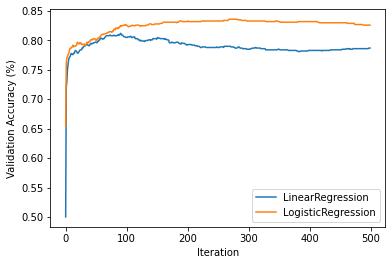

In [36]:
plt.plot(lin_val_accs, label='LinearRegression')
plt.plot(logi_val_accs, label='LogisticRegression')
plt.legend()
plt.xlabel('Iteration')
plt.ylabel('Validation Accuracy (%)')
plt.show()

#### Visualize the weights

Visualize the learned weights for each class. If your implementation is right, the visualization should be close to the average of the images.

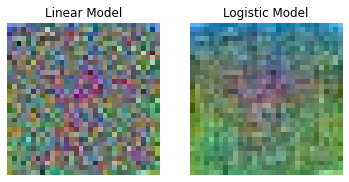

In [37]:
def visualize_model_weights(model, model_name):
    w = model.W.reshape(32, 32, 3)
    w_min, w_max = torch.min(w), torch.max(w)
    wimg = 255.0 * (w - w_min) / (w_max - w_min)

    plt.imshow(wimg.type(torch.uint8).cpu())
    plt.axis('off')
    plt.title(model_name)

plt.subplot(1,2,1)
visualize_model_weights(linear_model, 'Linear Model')
plt.subplot(1,2,2)
visualize_model_weights(logistic_model, 'Logistic Model')


### Q2.3 Softmax Regression (10 pts)

Softmax regression is a classification algorithm that extends logistic regression. It is used to predict the probability of a data point belonging to each of the K classes in a multi-class classification problem. In contrast to logistic regression, which only handles binary classification problems, softmax regression allows us to predict the probability of a data point belonging to any of K classes.

The softmax function is a generalization of the sigmoid function, which is used in logistic regression. It maps the output of a linear model to a probability distribution over the K classes. The softmax function is defined as:

$$\frac{e^{z_{i}}}{\sum_{j=1}^K e^{z_{j}}} \ \ \ for\ i=1,2,\dots,K$$

where z is the output of the linear model, and K is the number of classes.

The loss function for softmax regression is the negative log likelihood (NLL) loss. It measures the difference between the predicted probability distribution and the true probability distribution of the target class. The NLL loss is defined as:

$$-{\log(p(y))}$$

where p(y) is the predicted probability of the data point belonging to the true class y.

In the Softmax Regression class, you will need to implement:
1. The softmax function that maps the output of the linear model to a probability distribution over the K classes.
2. The NLL loss function that measures the difference between the predicted probability distribution and the true probability distribution of the target class.
3. The predict function that predicts the class of a data point based on the predicted probability distribution.

In [38]:
def softmax(x):
    # Implement the softmax function
    # x is the input data with shape (batch_size, input_size)
    # Return the softmax output with shape (batch_size, output_size)
    ################# Your Implementations ################################
    output = torch.div(torch.exp(x), torch.sum(torch.exp(x)))

    ################# End of your Implementations ##########################
    return  output
  


def nll_loss(pred_probs, targets):
    # Calculate the negative log likelihood loss
    # pred_probs is the predicted probability distribution with shape (batch_size, output_size)
    # targets is the ground-truth labels with shape (batch_size,)
    # Return the negative log likelihood loss with shape (batch_size,)

    # Hine: Convert the ground-truth labels to one-hot encoding using torch.eye()
    ################# Your Implementations ################################
    encoded = torch.eye(pred_probs.shape[1], device=targets.device)
    targets = targets.to(dtype = torch.int64)
    loss = -torch.log(torch.sum(torch.mul(pred_probs, encoded[targets]), dim=1))
    
    ################# End of your Implementations #################
    return loss

In [39]:
class SoftmaxRegression(LinearRegression):
    def __init__(self, input_size, output_size):
        super(SoftmaxRegression, self).__init__(input_size, output_size)

    def forward(self, x):
        # Apply the softmax function to the linear output
        ################# Your Implementations ################################
        output = softmax(torch.add(torch.matmul(self.W, x.transpose(0,1)).transpose(0,1), self.b.expand(x.shape[0], -1)))
        ################# End of your Implementations ##########################
        return output

    def get_loss(self, pred_logits, targets):
        # Calculate the cross-entropy loss
        ################# Your Implementations ################################
        loss = torch.mean(nll_loss(pred_logits, targets))
        ################# End of your Implementations ##########################
        return loss

    def evaluate(self, x, y):
        # Evaluate the performance of the linear regression model on the dataset
        # x is the input data, y is the ground-truth labels
        # Calculate the predicted labels
        y_pred = self.forward(x)
        y_pred = y_pred.argmax(dim=1)
        return (y_pred == y).float().mean().item()


In [40]:
# Prepare multi-class dataset
# Here "ori" indicates "original"
X_train_ori_multi, y_train_multi = multi_train.dataset['data'], multi_train.dataset['label']
X_val_ori_multi, y_val_multi = multi_val.dataset['data'], multi_val.dataset['label']

# Normalization
X_train_multi = normalize(X_train_ori_multi)
X_val_multi = normalize(X_val_ori_multi)

In [41]:
sfm_model = SoftmaxRegression(3072, 20)
sfm_val_accs = sfm_model.fit(X_train_multi, y_train_multi, X_val_multi, y_val_multi, lr, 100000, 1000)

val_acc: 0.216: 100%|██████████| 100000/100000 [03:01<00:00, 552.15it/s]


I can get a validation accuracy around 21%. How about you?

#### Visualize Weight

Now, visualize the weight for each class. If your implementation is right, the weight of each class should be equivalent to the average of the images of that class.

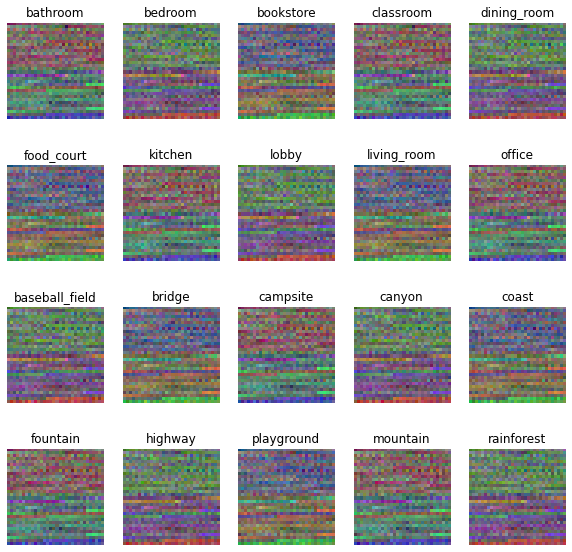

In [42]:
w = sfm_model.W.reshape(32, 32, 3, 20)
w_min, w_max = torch.min(w), torch.max(w)
plt.figure(figsize=(10,10))
classes = ['bathroom', 'bedroom', 'bookstore', 'classroom', 'dining_room', 'food_court', 'kitchen', 'lobby', 'living_room', 'office', 'baseball_field', 'bridge', 'campsite', 'canyon', 'coast', 'fountain', 'highway', 'playground', 'mountain', 'rainforest']
for i in range(20):
  plt.subplot(4,5, i + 1)
  # Rescale the weights to be between 0 and 255
  wimg = 255.0 * (w[:, :, :, i].squeeze() - w_min) / (w_max - w_min)
  plt.imshow(wimg.type(torch.uint8).cpu())
  plt.axis('off')
  plt.title(classes[i])

### Q2.4: Comparison (5 pts)

Use your own words, explain what's the difference between Linear Regression, Logistic Regression and Softmax Regression? (Write down your answer below)

**Your Answer**: [fill in the answer here]
Linear regression is used to predict continuous values. In contrast, logistic regression and softmax regression are used for classification. Softmax regression is a variant of logistic regression. Softmax regression is used for multiclass while logistic regression is used for binary.
-----

## Q3: KNN Classification (35 pts)

K-Nearest Neighbors (KNN) is a simple and powerful classification algorithm that is based on the idea of finding the k nearest data points (neighbors) to a given data point, and predicting the class of the data point based on the majority class of its neighbors.

You will implement a KNN classifier on the TinyPlaces dataset you created.

To implement KNN for binary classification, you need to follow these steps:

1. Define a distance function to measure the similarity between data points. The most common distance function used in KNN is the Euclidean distance.
2. Define the predict function that takes in a test data point and the number of neighbors (k) as input, and returns the predicted class. The predict function should perform the following steps:
  1. Calculate the distance between the test data point and each training data point.
  2. Sort the distances in ascending order and select the k nearest neighbors.
  3. Predict the class of the test data point based on the majority class of its k nearest neighbors.
3. Define the evaluate function that takes in the test data and ground-truth labels as input, and returns the accuracy of the KNN model on the test data.
4. Train and evaluate the KNN model on the training and test data.


---
### Q3.1 Three ways to compute distances (10pts)

In this question, you will be implementing three different ways to compute the distance matrix between all pairs of training and test examples. 

The distance matrix is an important component in many machine learning algorithms, as it allows us to measure the similarity between examples. In this case, we will be using the squared Euclidean distance as our measure of similarity. 

1. The first method you will implement uses explicit loops over the training and test sets, which can be computationally expensive for large datasets. 

2. The second method will use a single loop over the training set and vectorized operations to compute the distances. 

3. The third method will use no loops and only vectorized operations to compute the distances. These three methods will be compared in terms of efficiency and accuracy.

In [43]:
# We subsample a dataset for faster developement
binary_train_subsampled = binary_train.subsample(0.2)
binary_val_subsampled = binary_val.subsample(0.2)


# Here "ori" indicates "original
X_train, y_train = binary_train_subsampled.dataset['data'], binary_train_subsampled.dataset['label']
X_val, y_val = binary_val_subsampled.dataset['data'], binary_val_subsampled.dataset['label']

# Normalization
X_train = normalize(X_train)
X_val = normalize(X_val)


#### Explict but expensive two-loops

Lets begin with computing the distance matrix between all training and test examples. First we will implement a naive version of the distance computation, using explicit loops over the training and test sets.

**NOTE: When implementing distance functions for this assignment, you may not use functions `torch.norm` or `torch.dist` (or their instance method variants `x.norm` / `x.dist`); you may not use any functions from `torch.nn` or `torch.nn.functional`.**

In [44]:
def compute_distances_two_loops(x_train, x_test):
  """
  Computes the squared Euclidean distance between each element of the training
  set and each element of the test set. Images should be flattened and treated
  as vectors. This implementation uses a naive set of nested loops over the training and
  test data.

  The input data may have any number of dimensions -- for example this function
  should be able to compute nearest neighbor between vectors, in which case
  the inputs will have shape (num_{train, test}, D); it should alse be able to
  compute nearest neighbors between images, where the inputs will have shape
  (num_{train, test}, C, H, W). More generally, the inputs will have shape
  (num_{train, test}, D1, D2, ..., Dn); you should flatten each element
  of shape (D1, D2, ..., Dn) into a vector of shape (D1 * D2 * ... * Dn) before
  computing distances.

  Parameters:
    - x_train: Torch tensor of shape (num_train, D1, D2, ...)
    - x_test: Torch tensor of shape (num_test, D1, D2, ...)

Returns:
    - dists: Torch tensor of shape (num_train, num_test) where dists[i, j] is the
      squared Euclidean distance between the ith training point and the jth test
      point. It has the same dtype as x_train.
"""
  # Initialize dists to be a tensor of shape (num_train, num_test) with the
  # same datatype and device as x_train
  num_train = x_train.shape[0]
  num_test = x_test.shape[0]
  dists = torch.zeros(num_train, num_test, dtype=torch.float64)
  ##############################################################################
  # TODO: Implement this function using a pair of nested loops over the        #
  # training data and the test data.                                           #
  ##############################################################################
  for i, train_elem in enumerate(x_train):
    for j, test_elem in enumerate(x_test):
      dists[i][j] = torch.sum(torch.square(torch.sub(torch.flatten(train_elem), torch.flatten(test_elem))))
  
  ##############################################################################
  #                             END OF YOUR CODE                               #
  ##############################################################################
  return dists



In [45]:
# This cell should take a relative long time to run, as two-loop implementation is slow.
dists = compute_distances_two_loops(X_train, X_val)
print('dists has shape: ', dists.shape)

dists has shape:  torch.Size([2060, 206])


#### Efficient one-loop vectorization
Our implementation of the distance computation above is fairly inefficient since it uses nested Python loops over the training and test sets.

When implementing algorithms in PyTorch, it's best to avoid loops in Python if possible. Instead it is preferable to implement your computation so that all loops happen inside PyTorch functions. This will usually be much faster than writing your own loops in Python, since PyTorch functions can be internally optimized to iterate efficiently, possibly using multiple threads. This is especially important when using a GPU to accelerate your code.

The process of eliminating explict loops from your code is called **vectorization**. Sometimes it is straighforward to vectorize code originally written with loops; other times vectorizing requires thinking about the problem in a new way. We will use vectorization to improve the speed of our distance computation function.

As a first step toward vectorizing our distance computation, you will implement a version that uses only a single Python loop over the training data.

We can check the correctness of our one-loop implementation by comparing it with our two-loop implementation on some randomly generated data.

Note that we do the comparison with 64-bit floating points for increased numeric precision.

In [46]:
def compute_distances_one_loop(x_train, x_test):
  """
  Computes the squared Euclidean distance between each element of the training
  set and each element of the test set. Images should be flattened and treated
  as vectors.

  This implementation uses only a single loop over the training data.

  Similar to compute_distances_two_loops, this should be able to handle inputs
  with any number of dimensions. The inputs should not be modified.

  Inputs:
  - x_train: Torch tensor of shape (num_train, D1, D2, ...)
  - x_test: Torch tensor of shape (num_test, D1, D2, ...)

  Returns:
  - dists: Torch tensor of shape (num_train, num_test) where dists[i, j] is the
    squared Euclidean distance between the ith training point and the jth test
    point.
  """
  # Initialize dists to be a tensor of shape (num_train, num_test) with the
  # same datatype and device as x_train
  num_train = x_train.shape[0]
  num_test = x_test.shape[0]
  dists = torch.zeros(num_train, num_test, dtype=torch.float64)
  ##############################################################################
  # TODO: Implement this function using only a single loop over x_train.       #
  ##############################################################################
  x_test = torch.flatten(x_test, start_dim=1)
  for i, train_elem in enumerate(x_train):
    dists[i] = torch.sum(torch.square(torch.sub(torch.flatten(train_elem).view((1, train_elem.numel())).expand(num_test, -1), x_test)), dim=1, keepdim=True).transpose(0, 1)
  
  
  ##############################################################################
  ##############################################################################
  #                             END OF YOUR CODE                               #
  ##############################################################################
  return dists

In [47]:
torch.manual_seed(0)
x_train_rand = torch.randn(100, 3, 16, 16, dtype=torch.float64)
x_test_rand = torch.randn(100, 3, 16, 16, dtype=torch.float64)

dists_one = compute_distances_one_loop(x_train_rand, x_test_rand)
dists_two = compute_distances_two_loops(x_train_rand, x_test_rand)
difference = (dists_one - dists_two).pow(2).sum().sqrt().item()
print('Difference: ', difference)
if difference < 1e-4:
    print('Good! The distance matrices match')
else:
    print('Uh-oh! The distance matrices are different')

Difference:  0.0
Good! The distance matrices match


#### Efficient no-loop vectorization

You will now implement a fully vectorized version of the distance computation function
that does not use any Python loops.

In [48]:

def compute_distances_no_loops(x_train, x_test):
  """
  Computes the squared Euclidean distance between each element of the training
  set and each element of the test set. Images should be flattened and treated
  as vectors.

  This implementation should not use any Python loops. For memory-efficiency,
  it also should not create any large intermediate tensors; in particular you
  should not create any intermediate tensors with O(num_train*num_test)
  elements.

  Similar to compute_distances_two_loops, this should be able to handle inputs
  with any number of dimensions. The inputs should not be modified.

  NOTE: Your implementation may not use `torch.norm`, `torch.dist`,
  `torch.cdist`, or their instance method variants x.norm / x.dist / x.cdist.
  You may not use any functions from torch.nn or torch.nn.functional.
  Inputs:
  - x_train: Torch tensor of shape (num_train, C, H, W)
  - x_test: Torch tensor of shape (num_test, C, H, W)

  Returns:
  - dists: Torch tensor of shape (num_train, num_test) where dists[i, j] is the
    squared Euclidean distance between the ith training point and the jth test
    point.
  """
  # Initialize dists to be a tensor of shape (num_train, num_test) with the
  # same datatype and device as x_train
  num_train = x_train.shape[0]
  num_test = x_test.shape[0]
  dists = torch.zeros(num_train, num_test, dtype=torch.float64)
  ##############################################################################
  # TODO: Implement this function without using any explicit loops and without #
  # creating any intermediate tensors with O(num_train * num_test) elements.   #
  #                                                                            #
  # You may not use torch.norm (or its instance method variant), nor any       #
  # functions from torch.nn or torch.nn.functional.                            #
  #                                                                            #
  # HINT: Try to formulate the Euclidean distance using two broadcast sums     #
  #       and a matrix multiply.                                               #
  ##############################################################################
  train_flat = torch.flatten(x_train, start_dim=1)
  train_square = torch.square(train_flat)
  train_square_sum = torch.sum(train_square, dim=1)

  test_flat = torch.flatten(x_test, start_dim=1)
  test_square = torch.square(test_flat)
  test_square_sum = torch.sum(test_square, dim=1).view(test_square.shape[0], 1)

  offset = -2 * torch.matmul(train_flat, test_flat.transpose(0,1))
  dists = torch.add(torch.add(train_square_sum, test_square_sum).transpose(0,1), offset)
  

  
  
  ##############################################################################
  #                             END OF YOUR CODE                               #
  ##############################################################################
  return dists


As before, we can check the correctness of our implementation by comparing the fully vectorized version against the original naive version:

In [49]:
torch.manual_seed(0)
x_train_rand = torch.randn(100, 3, 16, 16, dtype=torch.float64)
x_test_rand = torch.randn(100, 3, 16, 16, dtype=torch.float64)

dists_two = compute_distances_two_loops(x_train_rand, x_test_rand)
dists_none = compute_distances_no_loops(x_train_rand, x_test_rand)
difference = (dists_two - dists_none).pow(2).sum().sqrt().item()
print('Difference: ', difference)
if difference < 1e-4:
  print('Good! The distance matrices match')
else:
  print('Uh-oh! The distance matrices are different')

Difference:  1.8907594267588928e-11
Good! The distance matrices match


We can now compare the speed of our three implementations. If you've implemented everything properly, the one-loop implementation should take less than 4 seconds to run, and the fully vectorized implementation should take less than 0.1 seconds to run.

In [50]:
import time
def timeit(f, *args):
    tic = time.time()
    f(*args) 
    toc = time.time()
    return toc - tic

torch.manual_seed(0)
x_train_rand = torch.randn(500, 3, 32, 32)
x_test_rand = torch.randn(500, 3, 32, 32)

two_loop_time = timeit(compute_distances_two_loops, x_train_rand, x_test_rand)
print('Two loop version took %.2f seconds' % two_loop_time)

one_loop_time = timeit(compute_distances_one_loop, x_train_rand, x_test_rand)
speedup = two_loop_time / one_loop_time
print('One loop version took %.2f seconds (%.1fX speedup)'
      % (one_loop_time, speedup))

no_loop_time = timeit(compute_distances_no_loops, x_train_rand, x_test_rand)
speedup = two_loop_time / no_loop_time
print('No loop version took %.2f seconds (%.1fX speedup)'
      % (no_loop_time, speedup))

Two loop version took 4.83 seconds
One loop version took 0.71 seconds (6.8X speedup)
No loop version took 0.05 seconds (100.5X speedup)


### Q3.2 Prediction function (10 pts)

Define the predict function that takes in a distance matrix, a set of memory labels (training labels), and the number of neighbors (k) as input, and returns the top-k indices and the predicted classes. The predict function should perform the following steps:

1. Sort the distance matrix in ascending order and select the top-k indices for each test sample.
2. Predict the class of each test sample based on the majority class among its k nearest neighbors in the training set.
3. Return the top-k indices and the predicted classes for each test sample.

Now, let's implement the `predict_labels` function to continue

In [53]:
def predict_labels(distance_matrix, memory_labels, k=1):
  """
  Given distances between all pairs of training and test samples, predict a
  label for each test sample by taking a **majority vote** among its k nearest
  neighbors in the training set.

  In the event of a tie, this function **should** return the smallest label. For
  example, if k=5 and the 5 nearest neighbors to a test example have labels
  [1, 2, 1, 2, 3] then there is a tie between 1 and 2 (each have 2 votes), so
  we should return 1 since it is the smallest label.
s
  This function should not modify any of its inputs.

  Inputs:
  - distance_matrix: Torch tensor of shape (num_train, num_test) where dists[i, j] is the
    squared Euclidean distance between the ith training point and the jth test
    point.
  - memory_labels: Torch tensor of shape (num_train,) giving labels for all training
    samples. Each label is an integer in the range [0, num_classes - 1]
  - k: The number of nearest neighbors to use for classification.

  Returns:
  - indices: top k indices of the most relevant images
  - y_pred: A torch int64 tensor of shape (num_test,) giving predicted labels
    for the test data, where y_pred[j] is the predicted label for the jth test
    example. Each label should be an integer in the range [0, num_classes - 1].
  """
  y_pred = torch.zeros(distance_matrix.shape[1], dtype=torch.int64)
  memory_labels = memory_labels.int()
  ##############################################################################
  # TODO: Implement this function. You may use an explicit loop over the test  #
  # samples. Hint: Look up the function torch.topk                             #
  ##############################################################################
  indices = torch.zeros( (distance_matrix.shape[1], k), dtype = torch.int64 )
  dist_copy = torch.transpose(distance_matrix, 0, 1)

  for i, distances in enumerate(dist_copy):
    _, inds = distances.topk(k, largest=False)
    indices[i] = inds
    y_pred[i] = torch.mode(memory_labels[inds].flatten()).values.item()
  y_pred = torch.LongTensor(y_pred)
  indices = indices.transpose(0,1)

  ##############################################################################
  #                             END OF YOUR CODE                               #
  ##############################################################################
  return indices, y_pred

#### Image Retrieval
We then work on a toy example of 1D data to test `predict_labels` to output the correct indices. If your implementation is correct, should output tensor([[1, 2, 0]]).

In [54]:
torch.manual_seed(0)
dists = torch.tensor([
    [0.3, 0.4, 0.1],
    [0.1, 0.5, 0.5],
    [0.4, 0.1, 0.2],
    [0.2, 0.2, 0.4],
    [0.5, 0.3, 0.3],
])
y_train = torch.tensor([0, 1, 0, 1, 2])
indices, _ = predict_labels(dists, y_train, k=1)
print (indices)

tensor([[1, 2, 0]])


Then we implement the `retrieval` function in `KNNClassifier` to retrieve 2D images. We use an example from the TinyPlaces dataset. We visualize the 5 most relevant images from the training dataset giving a sample from the test set.

In [55]:
class KNNClassifier():
    def __init__(self, x_train, y_train):
        """
        Create a new K-Nearest Neighbor classifier with the specified training data.
        In the initializer we simply memorize the provided training data.

        Inputs:
        - x_train: Torch tensor of shape (num_train, C, H, W) giving training data
        - y_train: int64 torch tensor of shape (num_train,) giving training labels
        """
        ###########################################################################
        # TODO: Implement the initializer for this class. It should perform no    #
        # computation and simply memorize the training data.                      #
        ###########################################################################
        self.x_train = x_train
        self.y_train = y_train
        ###########################################################################
        #                           END OF YOUR CODE                              #
        ###########################################################################

    def retrieval(self, x_test, k=1):
        """
        Retrieve the most relevant images from the training set

        Inputs:
        - x_test: Torch tensor of shape (num_test, C, H, W) giving test samples
        - k: The number of neighbors to use for predictions

        Returns:
        - indices: the indices of the top k most relevant images
        """
        ###########################################################################
        # TODO: Implement this method. You should use the functions you wrote     #
        # above for computing distances (use the no-loop variant) and to retrieve #
        # images                                                                  #
        ###########################################################################
        distances = compute_distances_no_loops(self.x_train, x_test)
        indices, _ = predict_labels(distances, self.y_train, k=k)
        ###########################################################################
        #                           END OF YOUR CODE                              #
        ########################################################################### 
        return indices

    def predict(self, x_test, k=1):
        """
        Make predictions using the classifier.

        Inputs:
        - x_test: Torch tensor of shape (num_test, C, H, W) giving test samples
        - k: The number of neighbors to use for predictions

        Returns:
        - y_test_pred: Torch tensor of shape (num_test,) giving predicted labels
          for the test samples.
        """
        y_test_pred = None
        ###########################################################################
        # TODO: Implement this method. You should use the functions you wrote     #
        # above for computing distances (use the no-loop variant) and to predict  #
        # output labels.
        ###########################################################################
        distances = compute_distances_no_loops(self.x_train, x_test)
        _, y_test_pred = predict_labels(distances, self.y_train, k=k)

        
        ###########################################################################
        #                           END OF YOUR CODE                              #
        ###########################################################################
        return y_test_pred

    def check_accuracy(self, x_test, y_test, k=1, quiet=False):
        """
        Utility method for checking the accuracy of this classifier on test data.
        Returns the accuracy of the classifier on the test data, and also prints a
        message giving the accuracy.

        Inputs:
        - x_test: Torch tensor of shape (num_test, C, H, W) giving test samples
        - y_test: int64 torch tensor of shape (num_test,) giving test labels
        - k: The number of neighbors to use for prediction
        - quiet: If True, don't print a message.

        Returns:
        - accuracy: Accuracy of this classifier on the test data, as a percent.
          Python float in the range [0, 100].
        """
        y_test_pred = self.predict(x_test, k)
        y_test_pred = y_test_pred.to(y_test.device)
        num_correct = (y_test_pred == y_test).sum().item()
        accuracy = float(num_correct) / y_test.shape[0] * 100
        if not quiet:
            print(f'Got {num_correct} / {y_test.shape[0]} correct => accuracy: {accuracy:.2f}')
        return accuracy



Then we implement the `retrieval` function in `KnnClassifier` to retrieve 2D images. We use an example from the TinyPlaces dataset. We visualize the 5 most relevant images from the training dataset giving a sample from the test set.

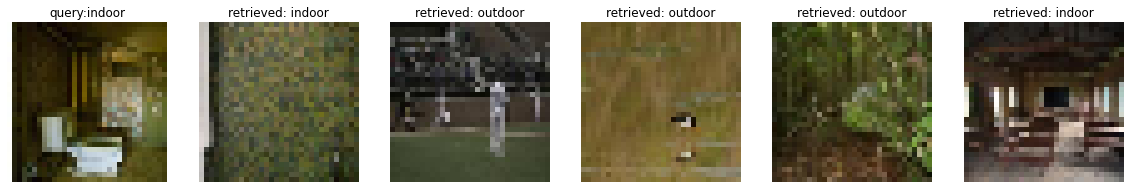

In [56]:
import torchvision
num_classes = 2
classes_list = ['indoor', 'outdoor']

# We subsample a dataset for faster developement
seed = None # You can fix a seed for deterministic results
binary_train_subsampled = binary_train.subsample(0.2, seed)
binary_val_subsampled = binary_val.subsample(0.2, seed)


# Here "ori" indicates "original
X_train, y_train = binary_train_subsampled.dataset['data'], binary_train_subsampled.dataset['label']
X_val, y_val = binary_val_subsampled.dataset['data'], binary_val_subsampled.dataset['label']

# Normalization
X_train = normalize(X_train)
X_val = normalize(X_val)

classifier = KNNClassifier(X_train, y_train)

indices = classifier.retrieval(X_val[:1], k=5)

plt.figure(figsize=(20,5))
plt.subplot(1,6,1)
plt.imshow(X_val[0].reshape(32,32,3).cpu().numpy())
plt.title(f'query:{classes_list[int(y_val[0])]}')
plt.axis('off')

for i, idx in enumerate(indices):
  plt.subplot(1,6,i+2)
  plt.imshow(X_train[idx].cpu().numpy().reshape(32, 32, 3))
  plt.axis('off')
  plt.title(f'retrieved: {classes_list[int(y_train[idx])]}')

plt.show()

#### Predict Labels
The next step is to output the labels via retrieved indices. We further implement `predict_labels` to output the labels for an example in the test set. Here we use a toy test. 

In [57]:
torch.manual_seed(0)
dists = torch.tensor([
    [0.3, 0.4, 0.1],
    [0.1, 0.5, 0.5],
    [0.4, 0.1, 0.2],
    [0.2, 0.2, 0.4],
    [0.5, 0.3, 0.3],
])
y_train = torch.tensor([0, 1, 0, 1, 2])
y_pred_expected = torch.tensor([1, 0, 0])
_, y_pred = predict_labels(dists, y_train, k=3)
correct = y_pred.tolist() == y_pred_expected.tolist()
print('Correct: ', correct)

Correct:  True


Then we use an example from the TinyPlaces dataset. 

In [58]:
# We subsample a dataset for faster developement
seed = None # You can fix a seed for deterministic results
binary_train_subsampled = binary_train.subsample(0.2, seed)
binary_val_subsampled = binary_val.subsample(0.2, seed)


# Here "ori" indicates "original
X_train, y_train = binary_train_subsampled.dataset['data'], binary_train_subsampled.dataset['label']
X_val, y_val = binary_val_subsampled.dataset['data'], binary_val_subsampled.dataset['label']

# Normalization
X_train = normalize(X_train)
X_val = normalize(X_val)

classifier = KNNClassifier(X_train, y_train)

y_pred_test = classifier.predict(X_val[:1], k=10).squeeze()

correct = y_pred_test == y_val[0]
print('Correct: ', correct)

Correct:  tensor(False, device='cuda:0')


#### Image Classification
We can now use the exact same KNN code to perform image classification on TinyPlaces!

Now lets put everything together and test our K-NN clasifier on the full TinyPlaces, using k=1:

In [59]:
X_train, y_train = binary_train.dataset['data'], binary_train.dataset['label']
X_val, y_val = binary_val.dataset['data'], binary_val.dataset['label']

# Normalization
X_train = normalize(X_train)
X_val = normalize(X_val)

classifier = KNNClassifier(X_train, y_train)
classifier.check_accuracy(X_val, y_val, k=1)

Got 680 / 1000 correct => accuracy: 68.00


68.0

Now lets increase to k=10. You should see a slightly higher accuracy than k=1:

In [60]:
torch.manual_seed(0)
classifier.check_accuracy(X_val, y_val, k=10)

Got 652 / 1000 correct => accuracy: 65.20


65.2

### Q3.3 Cross-validation (5 pts)
We have not implemented the full k-Nearest Neighbor classifier. We will use **cross-validation** to set this hyperparameter in a more principled manner.

Now, implement the function `knn_cross_validate` to perform cross-validation on k.

In [65]:
def knn_cross_validate(x_train, y_train, num_folds=5, k_choices=None):
  """
  Perform cross-validation for KnnClassifier.

  Inputs:
  - x_train: Tensor of shape (num_train, C, H, W) giving all training data
  - y_train: int64 tensor of shape (num_train,) giving labels for training data
  - num_folds: Integer giving the number of folds to use
  - k_choices: List of integers giving the values of k to try

  Returns:
  - k_to_accuracies: Dictionary mapping values of k to lists, where
    k_to_accuracies[k][i] is the accuracy on the ith fold of a KnnClassifier
    that uses k nearest neighbors.
  """
  if k_choices is None:
    # Use default values
    k_choices = [1, 3, 5, 8, 10, 12, 15, 20, 50, 100, 150, 200]

  # First we divide the training data into num_folds equally-sized folds.
  x_train_folds = []
  y_train_folds = []
  ##############################################################################
  # TODO: Split the training data and images into folds. After splitting,      #
  # x_train_folds and y_train_folds should be lists of length num_folds, where #
  # y_train_folds[i] is the label vector for images in x_train_folds[i].       #
  # Hint: torch.chunk                                                          #
  ##############################################################################
  x_train_folds = torch.chunk(x_train, num_folds)
  y_train_folds = torch.chunk(y_train, num_folds)

  ##############################################################################
  #                            END OF YOUR CODE                                #
  ##############################################################################

  # A dictionary holding the accuracies for different values of k that we find
  # when running cross-validation. After running cross-validation,
  # k_to_accuracies[k] should be a list of length num_folds giving the different
  # accuracies we found when trying KnnClassifiers that use k neighbors.
  k_to_accuracies = {}

  ##############################################################################
  # TODO: Perform cross-validation to find the best value of k. For each value #
  # of k in k_choices, run the k-nearest-neighbor algorithm num_folds times;   #
  # in each case you'll use all but one fold as training data, and use the     #
  # last fold as a validation set. Store the accuracies for all folds and all  #
  # values in k in k_to_accuracies.   HINT: torch.cat                          #
  ##############################################################################
  k_to_accuracies = { k: [0 for i in range(num_folds)] for k in k_choices }
  for k in k_choices:
    for i in range(num_folds):
      train_data = torch.cat(x_train_folds[:i] + x_train_folds[i+1:])
      train_labels = torch.cat(y_train_folds[:i] + y_train_folds[i+1:])

      val_data = x_train_folds[i]
      val_labels = y_train_folds[i]
      classifier = KNNClassifier(train_data, train_labels)

      print(f"k: {k}, fold: {i} ")
      k_to_accuracies[k][i] = classifier.check_accuracy(val_data, val_labels, k=k)
  

  ##############################################################################
  #                            END OF YOUR CODE                                #
  ##############################################################################

  return k_to_accuracies

In [66]:
torch.manual_seed(0)
X_train, y_train = binary_train.dataset['data'], binary_train.dataset['label']
# Normalization
X_train = normalize(X_train)

# Shuffle the data.
np.random.seed(0)
random_perm = np.arange(len(X_train))
np.random.shuffle(random_perm)
X_train, y_train = X_train[random_perm], y_train[random_perm]

k_to_accuracies = knn_cross_validate(X_train, y_train, num_folds=5)

for k, accs in sorted(k_to_accuracies.items()):
  print('k = %d got accuracies: %r' % (k, accs))

k: 1, fold: 0 
Got 1322 / 2000 correct => accuracy: 66.10
k: 1, fold: 1 
Got 1273 / 2000 correct => accuracy: 63.65
k: 1, fold: 2 
Got 1297 / 2000 correct => accuracy: 64.85
k: 1, fold: 3 
Got 1311 / 2000 correct => accuracy: 65.55
k: 1, fold: 4 
Got 1283 / 2000 correct => accuracy: 64.15
k: 3, fold: 0 
Got 1328 / 2000 correct => accuracy: 66.40
k: 3, fold: 1 
Got 1299 / 2000 correct => accuracy: 64.95
k: 3, fold: 2 
Got 1304 / 2000 correct => accuracy: 65.20
k: 3, fold: 3 
Got 1361 / 2000 correct => accuracy: 68.05
k: 3, fold: 4 
Got 1308 / 2000 correct => accuracy: 65.40
k: 5, fold: 0 
Got 1314 / 2000 correct => accuracy: 65.70
k: 5, fold: 1 
Got 1314 / 2000 correct => accuracy: 65.70
k: 5, fold: 2 
Got 1313 / 2000 correct => accuracy: 65.65
k: 5, fold: 3 
Got 1339 / 2000 correct => accuracy: 66.95
k: 5, fold: 4 
Got 1304 / 2000 correct => accuracy: 65.20
k: 8, fold: 0 
Got 1367 / 2000 correct => accuracy: 68.35
k: 8, fold: 1 
Got 1355 / 2000 correct => accuracy: 67.75
k: 8, fold: 2 

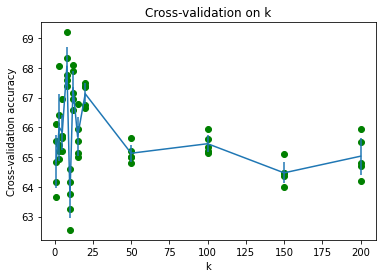

In [67]:
ks, means, stds = [], [], []
torch.manual_seed(0)
for k, accs in sorted(k_to_accuracies.items()):
  plt.scatter([k] * len(accs), accs, color='g')
  ks.append(k)
  means.append(np.mean(accs))
  stds.append(np.std(accs))
plt.errorbar(ks, means, yerr=stds)
plt.xlabel('k')
plt.ylabel('Cross-validation accuracy')
plt.title('Cross-validation on k')
plt.show()

Now, implement a greedy policy to find the best k value for the KNN classifier in our case.

In [75]:

def knn_get_best_k(k_to_accuracies):
  """
  Select the best value for k, from the cross-validation result from
  knn_cross_validate. If there are multiple k's available, then you SHOULD
  choose the smallest k among all possible answer.

  Inputs:
  - k_to_accuracies: Dictionary mapping values of k to lists, where
    k_to_accuracies[k][i] is the accuracy on the ith fold of a KnnClassifier
    that uses k nearest neighbors.

  Returns:
  - best_k: best (and smallest if there is a conflict) k value based on
            the k_to_accuracies info
  """
  best_k = 0
  ##############################################################################
  # TODO: Use the results of cross-validation stored in k_to_accuracies to     #
  # choose the value of k, and store the result in best_k. You should choose   #
  # the value of k that has the highest mean accuracy accross all folds.       #
  ##############################################################################

  avgs = { k: ( (sum(k_to_accuracies[k]) / len(k_to_accuracies[k])) ) for k in k_to_accuracies }
  best_k = max(avgs, key = lambda key: avgs[k])
  
  ##############################################################################
  #                            END OF YOUR CODE                                #
  ##############################################################################
  return best_k

Now we can use the results of cross-validation to select the best value for k, and rerun the classifier on our full set of training examples. 
(I can get an accuracy of 69.4%. Try to beat me!)

In [76]:
torch.manual_seed(0)
X_train, y_train = binary_train.dataset['data'], binary_train.dataset['label']
X_val, y_val = binary_val.dataset['data'], binary_val.dataset['label']
# Normalization
X_train = normalize(X_train)
X_val = normalize(X_val)

best_k = knn_get_best_k(k_to_accuracies)    
print('Best k is ', best_k)


classifier = KNNClassifier(X_train, y_train)
classifier.check_accuracy(X_val, y_val, k=best_k)

Best k is  1
Got 680 / 1000 correct => accuracy: 68.00


68.0

### Q3.4 Feature Extraction (5 pts)

Now, instead of using raw pixel values as input, we will extract the features from the images. We use histograms of colors as features. 

To do that, we first define a function to extract the color histogram feature from a 3072-d vector, which is reshaped from an RGB image of the shape (32, 32,3).

We take the following steps to implement:

1. Reshape the 3072-d vector into an image of shape (32, 32, 3).
2. Compute the histogram of the image using the `cv2.calcHist` function from the OpenCV library. This function takes in the image and a list of channels, and returns a histogram for each channel.
3. Normalize the histogran for each channel.
4. Concatenate the histograms of all channels into a single feature vector. 
5. Return the concatenated histogram as the color histogram feature.

Here is an example implementation:

In [77]:
import cv2
import numpy as np

def extract_color_histogram_feature(image_vector):
    # Assume the input vector is torch.tensor in cuda.
    image_vector = image_vector.cpu().numpy()
    # Reshape the image vector into an image of shape (32, 32, 3)
    image = np.reshape(image_vector, (32, 32, 3))
    # Compute the histogram for each channel
    histograms = []
    for channel in range(3):
        histogram = cv2.calcHist([image], [channel], None, [256], [0, 256])
        histograms.append(histogram/histogram.max())
    # Concatenate the histograms of all channels into a single feature vector
    histogram_feature = np.concatenate(histograms)
    
    return histogram_feature


Likewise, we will first perform cross validation

In [78]:
torch.manual_seed(0)
X_train, y_train = binary_train.dataset['data'], binary_train.dataset['label']
X_train = torch.tensor([extract_color_histogram_feature(x) for x in X_train])

# Shuffle the data.
np.random.seed(0)
random_perm = np.arange(len(X_train))
np.random.shuffle(random_perm)
X_train, y_train = X_train[random_perm], y_train[random_perm]

k_to_accuracies = knn_cross_validate(X_train, y_train, num_folds=5)

for k, accs in sorted(k_to_accuracies.items()):
  print('k = %d got accuracies: %r' % (k, accs))

<ipython-input-78-4014913798f0>:3: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:230.)
  X_train = torch.tensor([extract_color_histogram_feature(x) for x in X_train])


k: 1, fold: 0 
Got 1424 / 2000 correct => accuracy: 71.20
k: 1, fold: 1 
Got 1416 / 2000 correct => accuracy: 70.80
k: 1, fold: 2 
Got 1371 / 2000 correct => accuracy: 68.55
k: 1, fold: 3 
Got 1364 / 2000 correct => accuracy: 68.20
k: 1, fold: 4 
Got 1402 / 2000 correct => accuracy: 70.10
k: 3, fold: 0 
Got 1469 / 2000 correct => accuracy: 73.45
k: 3, fold: 1 
Got 1476 / 2000 correct => accuracy: 73.80
k: 3, fold: 2 
Got 1440 / 2000 correct => accuracy: 72.00
k: 3, fold: 3 
Got 1428 / 2000 correct => accuracy: 71.40
k: 3, fold: 4 
Got 1485 / 2000 correct => accuracy: 74.25
k: 5, fold: 0 
Got 1485 / 2000 correct => accuracy: 74.25
k: 5, fold: 1 
Got 1512 / 2000 correct => accuracy: 75.60
k: 5, fold: 2 
Got 1434 / 2000 correct => accuracy: 71.70
k: 5, fold: 3 
Got 1438 / 2000 correct => accuracy: 71.90
k: 5, fold: 4 
Got 1500 / 2000 correct => accuracy: 75.00
k: 8, fold: 0 
Got 1501 / 2000 correct => accuracy: 75.05
k: 8, fold: 1 
Got 1502 / 2000 correct => accuracy: 75.10
k: 8, fold: 2 

Using features, I can achieve 72.4% accuracy. What about you?

In [79]:
torch.manual_seed(0)

X_train, y_train = binary_train.dataset['data'], binary_train.dataset['label']
X_train = torch.tensor([extract_color_histogram_feature(x) for x in X_train])

X_val, y_val = binary_val.dataset['data'], binary_val.dataset['label']
X_val = torch.tensor([extract_color_histogram_feature(x) for x in X_val])

best_k = knn_get_best_k(k_to_accuracies)    
print('Best k is ', best_k)


classifier = KNNClassifier(X_train, y_train)
classifier.check_accuracy(X_val, y_val, k=best_k)

Best k is  1
Got 686 / 1000 correct => accuracy: 68.60


68.60000000000001

#### Write down your understanding of feature extraction, and how it affects the performances (5 pts)

**Your Answer**: [Write down your answer here] Feature extraction transforms the data while retaining underlying information about the data. Feature extraction provides more varying information for the model to learn from, which would lead to improved performance.




### Q3.5 KNN (Multi-Class Classification)

Now we we will switch to multi-class classification. Instead of classifying indoor-outdoor scenes, we will have all the 20 sub-categories for classification.

You do not need to change your implementations here. Just set ``binary`` to ``False`` when calling tinyplaces loader. 

We will also go through cross validation first.

In [80]:
torch.manual_seed(0)
X_train, y_train = multi_train.dataset['data'], multi_train.dataset['label']
X_val, y_val = multi_val.dataset['data'], multi_val.dataset['label']
# Normalization
X_train = normalize(X_train)
X_val = normalize(X_val)

# Shuffle the data.
np.random.seed(0)
random_perm = np.arange(len(X_train))
np.random.shuffle(random_perm)
X_train, y_train = X_train[random_perm], y_train[random_perm]

k_to_accuracies = knn_cross_validate(X_train, y_train, num_folds=5)

for k, accs in sorted(k_to_accuracies.items()):
  print('k = %d got accuracies: %r' % (k, accs))

k: 1, fold: 0 
Got 260 / 2000 correct => accuracy: 13.00
k: 1, fold: 1 
Got 215 / 2000 correct => accuracy: 10.75
k: 1, fold: 2 
Got 256 / 2000 correct => accuracy: 12.80
k: 1, fold: 3 
Got 239 / 2000 correct => accuracy: 11.95
k: 1, fold: 4 
Got 266 / 2000 correct => accuracy: 13.30
k: 3, fold: 0 
Got 272 / 2000 correct => accuracy: 13.60
k: 3, fold: 1 
Got 225 / 2000 correct => accuracy: 11.25
k: 3, fold: 2 
Got 265 / 2000 correct => accuracy: 13.25
k: 3, fold: 3 
Got 244 / 2000 correct => accuracy: 12.20
k: 3, fold: 4 
Got 266 / 2000 correct => accuracy: 13.30
k: 5, fold: 0 
Got 294 / 2000 correct => accuracy: 14.70
k: 5, fold: 1 
Got 256 / 2000 correct => accuracy: 12.80
k: 5, fold: 2 
Got 268 / 2000 correct => accuracy: 13.40
k: 5, fold: 3 
Got 251 / 2000 correct => accuracy: 12.55
k: 5, fold: 4 
Got 288 / 2000 correct => accuracy: 14.40
k: 8, fold: 0 
Got 283 / 2000 correct => accuracy: 14.15
k: 8, fold: 1 
Got 279 / 2000 correct => accuracy: 13.95
k: 8, fold: 2 
Got 253 / 2000 c

In [81]:
best_k = knn_get_best_k(k_to_accuracies)    
print('Best k is ', best_k)

classifier = KNNClassifier(X_train, y_train)
classifier.check_accuracy(X_val, y_val, k=best_k)

Best k is  1
Got 127 / 1000 correct => accuracy: 12.70


12.7

I get only around 14.7% accuracy based on the naive implementation. How about you?

#### Bonus (Optional, 10 pts)

Try to reach 20% accuracy for multi-class KNN classification.

Explain your solution and present your code in the following cells.

Your answer: